#Installing Library

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Reading the Dataset

In [ ]:
#import the dataset
data = pd.read_csv('/content/drive/MyDrive/SIB - Bisa AI Academy/WEBINAR/Introduction Unsupervised Learning - Kmeans /College-data.csv')
data.shape

(777, 18)

In [ ]:
#Cek Data
data.head()


,Unnamed: 0,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#Descriptive Statiastics

In [ ]:
#describe the data
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [ ]:
#Chech some information from the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [ ]:
data.describe(include = 'object')

,Unnamed: 0
count,777
unique,777
top,Abilene Christian University
freq,1


In [ ]:
data['Grad.Rate'].dtype

dtype('int64')

In [ ]:
data.describe(include = 'object')

,Unnamed: 0
count,777
unique,777
top,Abilene Christian University
freq,1


#Clustering Analysis

In [ ]:

from sklearn.cluster import KMeans

In [ ]:
data = data.rename(columns={'Unnamed: 0' : 'University'})

In [ ]:
data = data.set_index('University')
data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
University,,,,,,,,,,,,,,,,,
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
#define x
x = data

#check the shape of x
print(x.shape)

(777, 17)


#Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

WCSS (Within-Cluster Sum of Squares).Dalam konteks algoritma K-means, WCSS mengacu pada jumlah kuadrat jarak antara setiap titik data dalam suatu klaster dengan pusatnya (centroid) yang sesuai. Tujuan dari algoritma K-means adalah untuk mengelompokkan titik-titik data ke dalam klaster sedemikian rupa sehingga WCSS menjadi minimal, yang menunjukkan bahwa titik-titik dalam klaster tersebut cenderung berdekatan satu sama lain dan jauh dari titik-titik di klaster lainnya. Dengan kata lain, WCSS adalah metrik evaluasi yang digunakan untuk mengukur seberapa baik model K-means mengelompokkan data. Semakin rendah nilai WCSS, semakin baik modelnya.



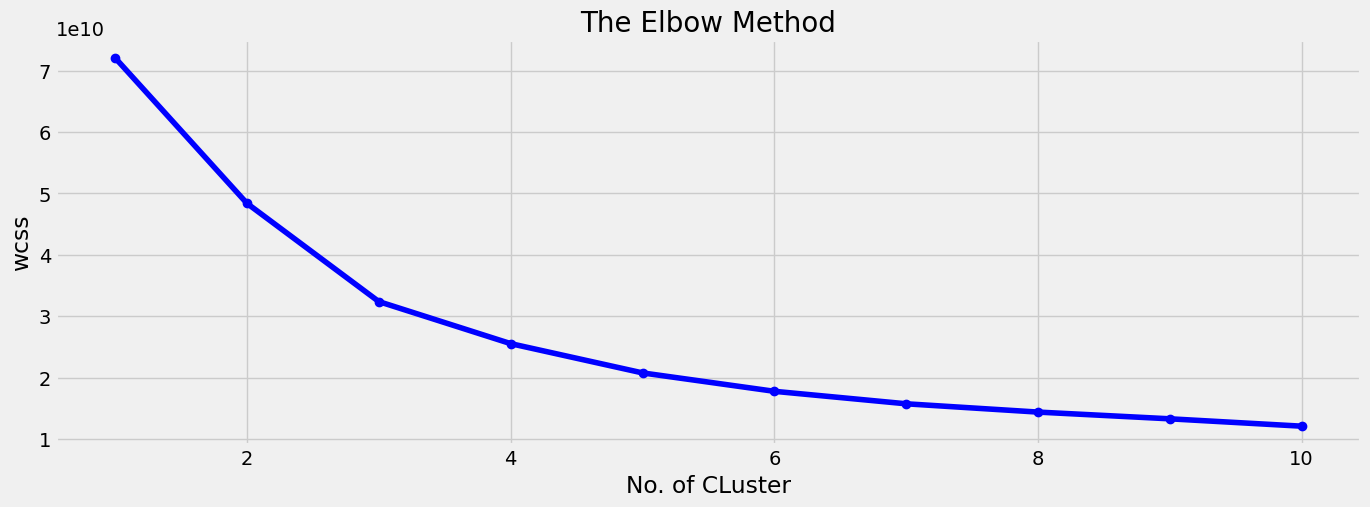

In [ ]:
from sklearn.cluster import KMeans

wcss =[]
for i in range (1,11):
  km = KMeans(n_clusters =i , init = "k-means++",max_iter=300,n_init=10,random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)


plt.figure(figsize=(15,5))
plt.plot(range(1,11), wcss,'bo-')
plt.title('The Elbow Method',fontsize = 20)
plt.xlabel('No. of CLuster')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
x['Labels']=kmeans.labels_

x

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Labels
University,,,,,,,,,,,,,,,,,,
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,1
Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1


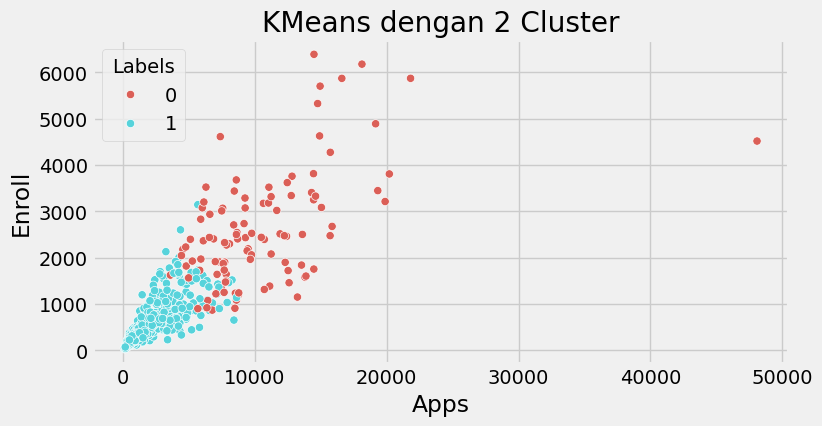

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.scatterplot(x='Apps', y='Enroll', hue='Labels', data=x,
                palette=sns.color_palette('hls', 2))

plt.title('KMeans dengan 2 Cluster')
plt.show()


In [ ]:
plt.figure(figsize=(8,4))
sns.pairplot(x,hue='Labels')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Conclusion

After finish the Clustering Analysis, i choose the best cluster for this dataset is 2 CLuster. We can see from Elbow methide visualization and from each clusters visualization for 2-5 clusters, the best cluster is 2, because if we choose 2 or more clusters, There are too many clusters that we make so it is not effective in its implementation